# Hr Analysis project
![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTs0lO2Y5Nq6K9p5HBNkxqGtUsZG71IT-DRJqIf2iZGZxD6N5aqha0ZanZU2Q&s)

# importing libraries 

In [1]:
!pip install -q seaborn

In [2]:
!pip install -q bokeh 

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
import warnings
warnings.filterwarnings('ignore')

# importing datasheet 

In [4]:
nRowsRead = None
df = pd.read_csv('../singh/HR_Analytics.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'HR_Analytics.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1480 rows and 38 columns


In [5]:
df.head(2)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0


# EDA (Exploratory Data Analysis)

### Checking Unique Values

In [6]:
unique_values = df.nunique()

print("Unique values per column:")
print(unique_values)

Unique values per column:
EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours    

### Checking Value Counts for each column

In [7]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("--------------------------------------")

Value counts for column 'EmpID':
EmpID
RM1467    2
RM1468    2
RM1465    2
RM1463    2
RM1461    2
         ..
RM881     1
RM851     1
RM757     1
RM693     1
RM1210    1
Name: count, Length: 1470, dtype: int64
--------------------------------------
Value counts for column 'Age':
Age
35    78
34    78
36    70
31    70
29    69
32    61
30    60
38    58
33    58
40    57
37    50
27    49
28    48
42    46
39    44
45    41
41    40
26    40
44    33
46    33
43    32
50    31
24    26
25    26
49    25
47    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
--------------------------------------
Value counts for column 'AgeGroup':
AgeGroup
26-35    611
36-45    471
46-55    228
18-25    123
55+       47
Name: count, dtype: int64
--------------------------------------
Value counts for column 'Attrition':
Attrition
No     1242
Yes     238
Name: count, dtyp

### Summary Statistics

In [8]:
summary_statistics = df.describe()

print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.729730   
std        60

### Checking for Duplicates

In [9]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)
else:
    print("No duplicates found.")

Duplicates found:
       EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
211   RM1468   27    26-35        No      Travel_Rarely        155   
328   RM1461   29    26-35        No      Travel_Rarely        468   
458   RM1464   31    26-35        No         Non-Travel        325   
655   RM1470   34    26-35        No       TravelRarely        628   
954   RM1463   39    36-45        No      Travel_Rarely        722   
1305  RM1469   49    46-55        No  Travel_Frequently       1023   
1336  RM1462   50    46-55       Yes      Travel_Rarely        410   

                  Department  DistanceFromHome  Education EducationField  ...  \
211   Research & Development                 4          3  Life Sciences  ...   
328   Research & Development                28          4        Medical  ...   
458   Research & Development                 5          3        Medical  ...   
655   Research & Development                 8          3        Medical  ...   
954             

## Data cleaning 

### removing duplicate 

In [10]:
duplicates = df[df.duplicated()]

df = df.drop_duplicates()

print("Duplicates removed:", len(duplicates))

Duplicates removed: 7


### Handling Blank Spaces

In [11]:
string_columns = df.select_dtypes(include=['object']).columns

df[string_columns] = df[string_columns].replace(r'^\s*$', np.nan, regex=True)

print(df[string_columns])

       EmpID AgeGroup Attrition     BusinessTravel              Department  \
0      RM297    18-25       Yes      Travel_Rarely  Research & Development   
1      RM302    18-25        No      Travel_Rarely                   Sales   
2      RM458    18-25       Yes  Travel_Frequently                   Sales   
3      RM728    18-25        No         Non-Travel  Research & Development   
4      RM829    18-25       Yes         Non-Travel  Research & Development   
...      ...      ...       ...                ...                     ...   
1475   RM412      55+        No      Travel_Rarely  Research & Development   
1476   RM428      55+        No  Travel_Frequently                   Sales   
1477   RM537      55+        No      Travel_Rarely                   Sales   
1478   RM880      55+        No      Travel_Rarely                   Sales   
1479  RM1210      55+        No      Travel_Rarely  Research & Development   

     EducationField  Gender                    JobRole MaritalS

### Handling Missing Values

In [12]:
missing_values = df.isnull().sum()

print(missing_values)

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

### Removing Outliers

In [13]:
from scipy import stats

numerical_columns = df.select_dtypes(include='number').columns

def remove_outliers(column):
    z_scores = stats.zscore(column)
    threshold = 3
    return column[(z_scores <= threshold) & (z_scores >= -threshold)]

cleaned_df = df.copy()  

for column in numerical_columns:
    cleaned_df[column] = remove_outliers(cleaned_df[column])

### Dropping Unnecessary Columns

In [14]:
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [15]:
df = df.drop(['Over18'], axis=1)

### YearsWithCurrManager Analysis as it as has 57 misisng values

In [16]:
summary = df['YearsWithCurrManager'].describe()

print(summary)

count    1416.000000
mean        4.117232
std         3.559344
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64


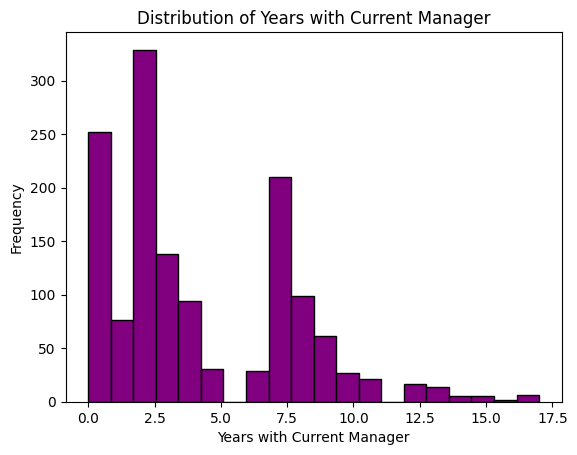

The range with the highest frequency for YearsWithCurrManager is between 1.7 and 2.55


In [17]:
import matplotlib.pyplot as plt
import numpy as np

cleaned_data = df['YearsWithCurrManager'].dropna()

plt.hist(cleaned_data, bins=20, color='purple', edgecolor='black')
plt.xlabel('Years with Current Manager')
plt.ylabel('Frequency')
plt.title('Distribution of Years with Current Manager')
plt.show()

bin_edges, _ = np.histogram(cleaned_data, bins=20)
max_bin_index = np.argmax(bin_edges)
bin_width = (_[1] - _[0])
max_range_start = _[max_bin_index]
max_range_end = _[max_bin_index + 1]
print(f'The range with the highest frequency for YearsWithCurrManager is between {max_range_start} and {max_range_start + bin_width}')

# heatmap of dataset

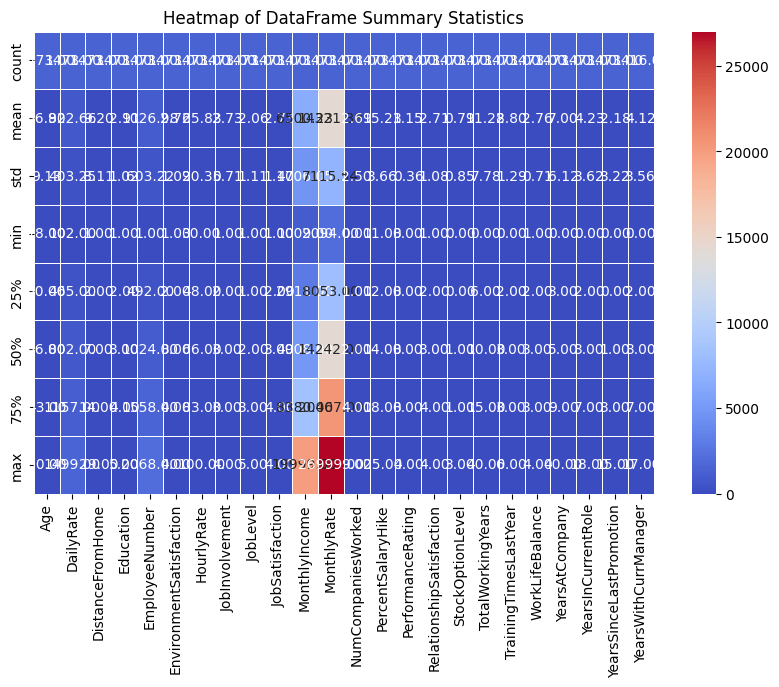

In [23]:
summary = df.describe()

plt.figure(figsize=(10, 6))
sns.heatmap(summary, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of DataFrame Summary Statistics')
plt.show()

# KPI findings

### attrition rate for each age groups 

In [24]:
attrition_counts = df.groupby(['AgeGroup', 'Attrition']).size().unstack(fill_value=0)

attrition_counts['AttritionRate'] = (attrition_counts['Yes'] / (attrition_counts['Yes'] + attrition_counts['No'])) * 100

print("Attrition Rate for Each Age Group:")
print(attrition_counts['AttritionRate'])

Attrition Rate for Each Age Group:
AgeGroup
18-25    35.772358
26-35    19.110379
36-45     9.148936
46-55    11.504425
55+      17.021277
Name: AttritionRate, dtype: float64


### attrition rate by age and gender

In [68]:
attrition_rate = df.groupby(['Age', 'Gender'])['Attrition'].apply(lambda x: (x == 'Yes').mean() * 100).unstack(fill_value=0)
print(attrition_rate)

Gender     Female       Male
Age                         
18      25.000000  75.000000
19      50.000000  80.000000
20      66.666667  40.000000
21      83.333333  14.285714
22      40.000000  27.272727
23       0.000000  30.769231
24      36.363636  20.000000
25       0.000000  30.000000
26      20.000000  36.000000
27       9.090909   3.846154
28      25.000000  30.555556
29      34.482759  20.512821
30      19.230769  11.764706
31      25.000000  26.829268
32      13.043478  21.052632
33      25.000000  17.647059
34      12.121212  11.363636
35      11.111111  13.725490
36       3.448276  12.195122
37       5.555556  15.625000
38       0.000000   6.451613
39      12.500000  14.814815
40       4.166667  12.121212
41      26.666667   8.000000
42       0.000000   6.666667
43       7.142857   5.555556
44      10.000000  21.739130
45      11.764706   0.000000
46      13.333333  11.111111
47       7.142857  20.000000
48      14.285714   8.333333
49       8.333333   8.333333
50       0.000

In [25]:
attrition_rate_overall = (df['Attrition'].value_counts(normalize=True) * 100).get('Yes', 0)

print("Overall Attrition Rate:", attrition_rate_overall, "%")

Overall Attrition Rate: 16.08961303462322 %


### BusinessTravel by each group

In [26]:
df['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely', inplace=True)

business_travel_counts = df.groupby(['AgeGroup', 'BusinessTravel']).size().unstack(fill_value=0)

business_travel_rates = business_travel_counts.div(business_travel_counts.sum(axis=1), axis=0) * 100

print("Rate of BusinessTravel by Age Group:")
print(business_travel_rates)

Rate of BusinessTravel by Age Group:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
AgeGroup                                                    
18-25            10.569106          13.821138      75.609756
26-35             9.555189          21.087315      69.357496
36-45            12.340426          18.936170      68.723404
46-55             7.522124          16.814159      75.663717
55+               8.510638          12.765957      78.723404


### Daily rate by age group

In [27]:
dailyrate_by_agegroup = df.groupby('AgeGroup')['DailyRate'].mean()

print("DailyRate by Age Group:")
print(dailyrate_by_agegroup)

DailyRate by Age Group:
AgeGroup
18-25    773.016260
26-35    802.976936
36-45    799.391489
46-55    823.699115
55+      807.659574
Name: DailyRate, dtype: float64


### business travel by gender

In [28]:
business_travel_by_gender = df.groupby(['Gender', 'BusinessTravel']).size().unstack(fill_value=0)

print("BusinessTravel by Gender:")
print(business_travel_by_gender)

BusinessTravel by Gender:
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Gender                                                      
Female                  49                117            423
Male                   101                161            622


### gender count for each age groups 

In [61]:
gender_counts = df.groupby(['AgeGroup', 'Gender']).size().unstack(fill_value=0)
print(gender_counts)

Gender    Female  Male
AgeGroup              
18-25         43    80
26-35        239   368
36-45        186   284
46-55        100   126
55+           21    26


### MaritalStatus by Gender

In [30]:
marital_status_by_gender = df.groupby(['Gender', 'MaritalStatus']).size().unstack(fill_value=0)

print("MaritalStatus by Gender:")
print(marital_status_by_gender)

MaritalStatus by Gender:
MaritalStatus  Divorced  Married  Single
Gender                                  
Female              117      272     200
Male                210      403     271


### monthly income by gender age group

In [80]:
monthly_income_by_gender_age = df.groupby(['Gender', 'AgeGroup'])['MonthlyIncome'].mean().unstack()

print("MonthlyIncome by Gender and Age:")
print(monthly_income_by_gender_age)

MonthlyIncome by Gender and Age:
AgeGroup        18-25        26-35        36-45         46-55          55+
Gender                                                                    
Female    2948.511628  5028.594142  7049.532258  10869.240000  9900.476190
Male      2985.987500  4804.038043  7134.609155  10974.563492  8630.038462


### education field by gender

In [63]:
education_field_by_gender = df.groupby(['Gender', 'EducationField']).size().unstack(fill_value=0)

print("EducationField by Gender:")
print(education_field_by_gender)

EducationField by Gender:
EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Gender                                                                      
Female                        8            240         69      190     30   
Male                         19            366         90      276     53   

EducationField  Technical Degree  
Gender                            
Female                        52  
Male                          80  


### EnvironmentSatisfaction by Age and Gender

In [33]:
env_satisfaction_by_age_gender = df.groupby(['Age', 'Gender'])['EnvironmentSatisfaction'].mean().unstack(fill_value=0)

print("EnvironmentSatisfaction by Age and Gender:")
print(env_satisfaction_by_age_gender)

EnvironmentSatisfaction by Age and Gender:
Gender    Female      Male
Age                       
18      3.000000  2.500000
19      2.000000  2.800000
20      3.666667  2.600000
21      2.666667  2.714286
22      2.000000  3.181818
23      3.000000  2.846154
24      2.363636  2.600000
25      2.333333  2.600000
26      2.533333  2.360000
27      2.863636  2.923077
28      2.833333  2.611111
29      2.758621  2.769231
30      2.769231  2.970588
31      2.785714  2.487805
32      2.652174  3.000000
33      2.375000  2.764706
34      2.757576  2.818182
35      2.962963  2.882353
36      2.586207  2.414634
37      2.777778  2.562500
38      2.740741  2.935484
39      2.875000  2.777778
40      2.750000  2.545455
41      2.466667  2.840000
42      2.625000  2.833333
43      2.642857  2.722222
44      1.900000  2.695652
45      2.764706  2.458333
46      2.866667  2.833333
47      2.785714  2.500000
48      3.000000  2.833333
49      2.833333  2.666667
50      3.222222  2.619048
51      2.28

### OverTime by Age and Gender

In [103]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

overtime_mean_by_age_gender = df.groupby(['AgeGroup', 'Gender','OverTime']).size().unstack(fill_value=0)

print("OverTime by Age group and Gender:")
print(overtime_mean_by_age_gender)

OverTime by Age group and Gender:
OverTime           0   1
AgeGroup Gender         
18-25    Female   25  18
         Male     59  21
26-35    Female  169  70
         Male    279  89
36-45    Female  130  56
         Male    205  79
46-55    Female   73  27
         Male     87  39
55+      Female   12   9
         Male     18   8


### department by gender

In [35]:
department_by_gender = df.groupby('Gender')['Department'].value_counts().unstack(fill_value=0)

print("Department by Gender:")
print(department_by_gender)

Department by Gender:
Department  Human Resources  Research & Development  Sales
Gender                                                    
Female                   20                     379    190
Male                     43                     584    257


### jobrole by gender

In [36]:
job_role_by_gender = df.groupby('Gender')['JobRole'].value_counts().unstack(fill_value=0)

print("JobRole by Gender:")
print(job_role_by_gender)

JobRole by Gender:
JobRole  Healthcare Representative  Human Resources  Laboratory Technician  \
Gender                                                                       
Female                          51               16                     85   
Male                            81               36                    175   

JobRole  Manager  Manufacturing Director  Research Director  \
Gender                                                        
Female        47                      72                 33   
Male          55                      73                 47   

JobRole  Research Scientist  Sales Executive  Sales Representative  
Gender                                                              
Female                  114              132                    39  
Male                    178              194                    45  


# data visualizations 

### education by gender 

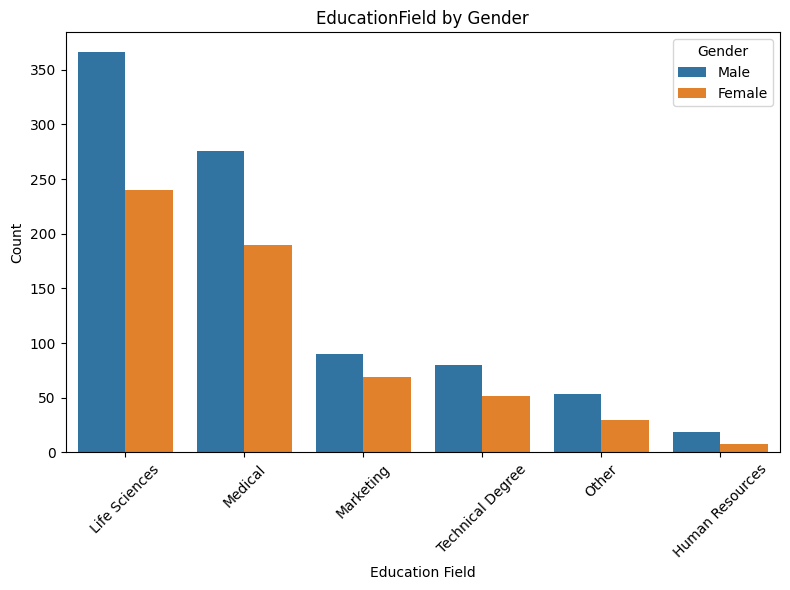

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EducationField', hue='Gender')
plt.title('EducationField by Gender')
plt.xlabel('Education Field')
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

### environment satisfaction by age and gender

In [38]:
output_notebook()
male_data = env_satisfaction_by_age_gender.loc[:, 'Male']
female_data = env_satisfaction_by_age_gender.loc[:, 'Female']
ages = list(env_satisfaction_by_age_gender.index)

p1 = figure(title='Mean EnvironmentSatisfaction for Males by Age', x_axis_label='Age', y_axis_label='Mean EnvironmentSatisfaction')
p1.line(ages, male_data, line_width=2, legend_label='Male', color='blue', alpha=0.7)

p2 = figure(title='Mean EnvironmentSatisfaction for Females by Age', x_axis_label='Age', y_axis_label='Mean EnvironmentSatisfaction')
p2.line(ages, female_data, line_width=2, legend_label='Female', color='red', alpha=0.7)

grid = gridplot([[p1], [p2]])

show(grid)

Loading BokehJS ...

### Department by gender

In [39]:
from bokeh.plotting import figure, show
from bokeh.palettes import Spectral10
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource


departments = department_by_gender.columns.tolist()
genders = department_by_gender.index.tolist()

colors = Spectral10[:len(departments)]
source = ColumnDataSource(department_by_gender)

p = figure(x_range=genders, height=350, title="Department by Gender",
           toolbar_location=None, tools="")

p.vbar_stack(departments, x='Gender', width=0.9, color=colors, source=source,
             legend_label=departments)

p.y_range.start = 0
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

### Attrition Rate by Age and Gender

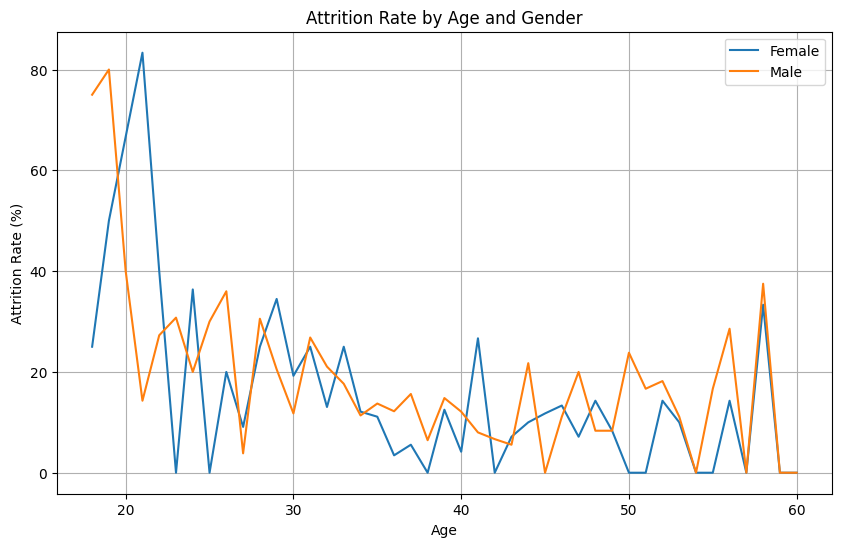

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

for gender in attrition_rate.columns:
    ax.plot(attrition_rate.index, attrition_rate[gender], label=gender)

ax.set_xlabel('Age')
ax.set_ylabel('Attrition Rate (%)')
ax.set_title('Attrition Rate by Age and Gender')
ax.legend()
ax.grid(True)

plt.show()

### Business Travel by Age

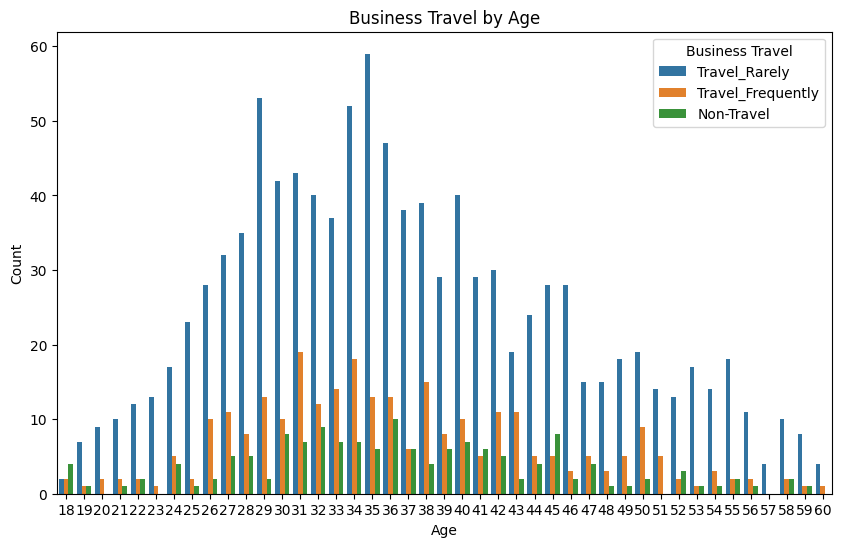

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='BusinessTravel')
plt.title('Business Travel by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Business Travel')

plt.show()

### marital status by gender

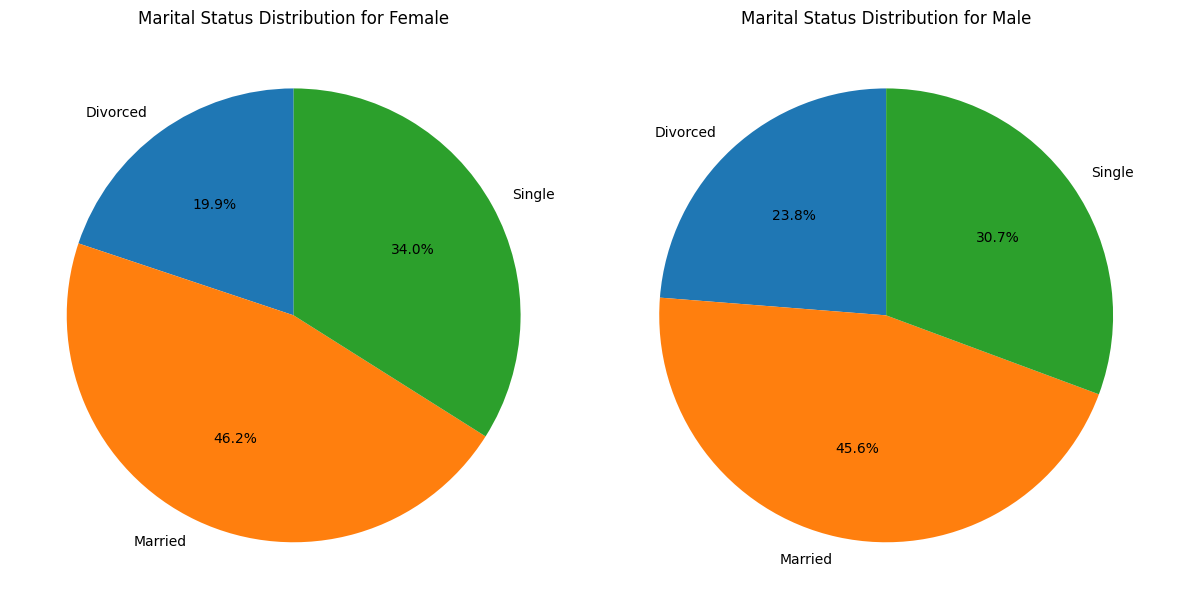

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(marital_status_by_gender.index):
    axes[i].pie(marital_status_by_gender.loc[gender], labels=marital_status_by_gender.columns, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Marital Status Distribution for {gender}")

plt.tight_layout()
plt.show()

### overtime distribution by Age group and gender

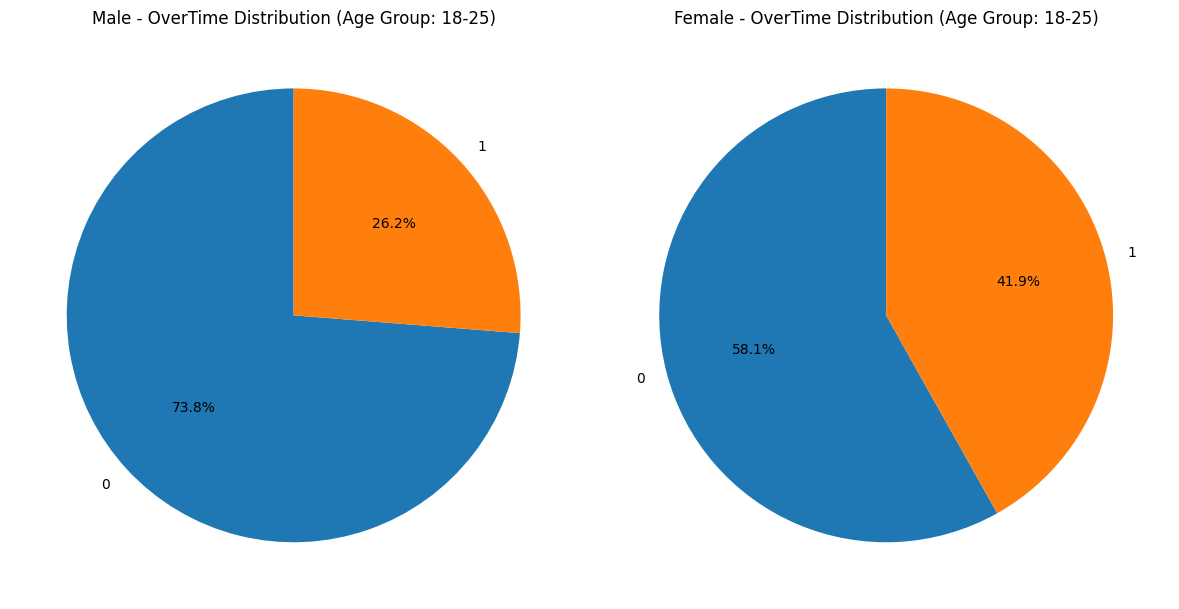

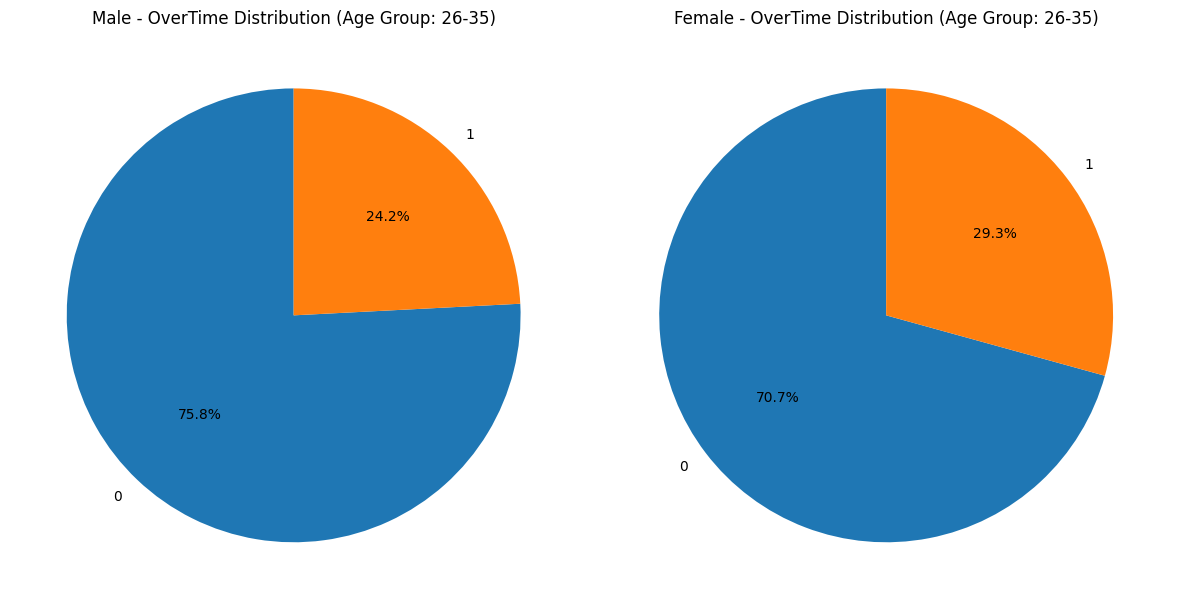

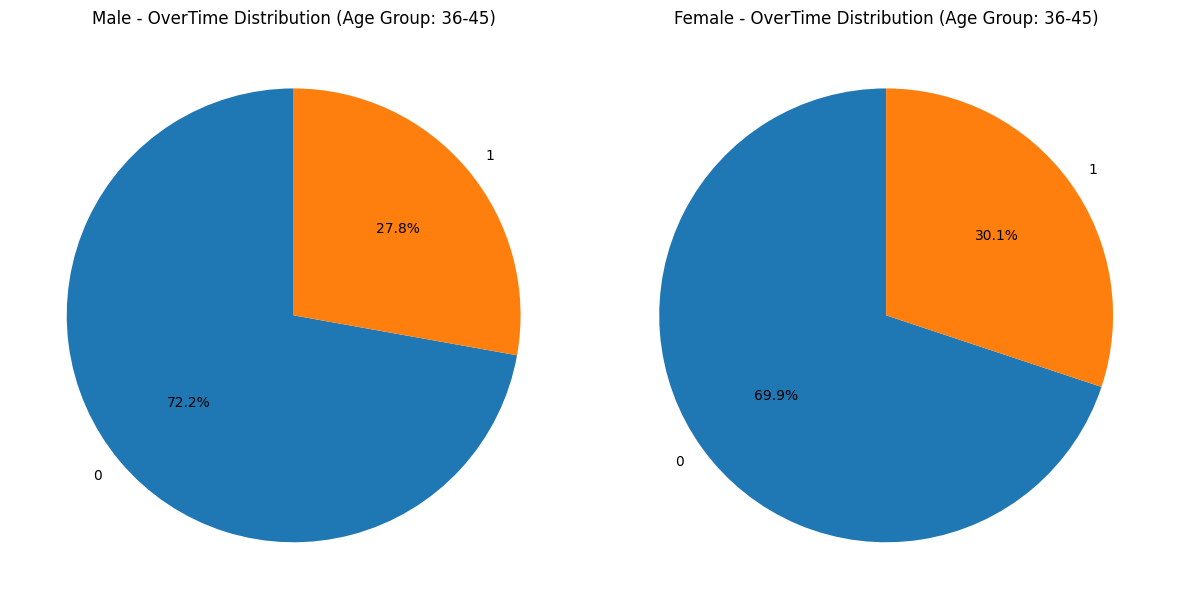

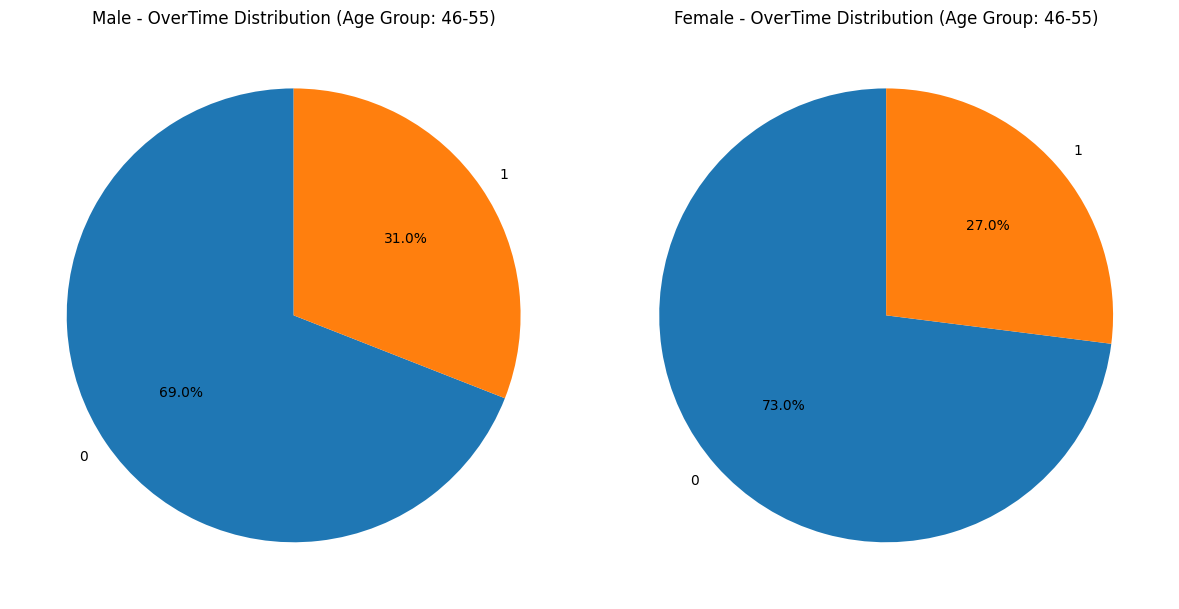

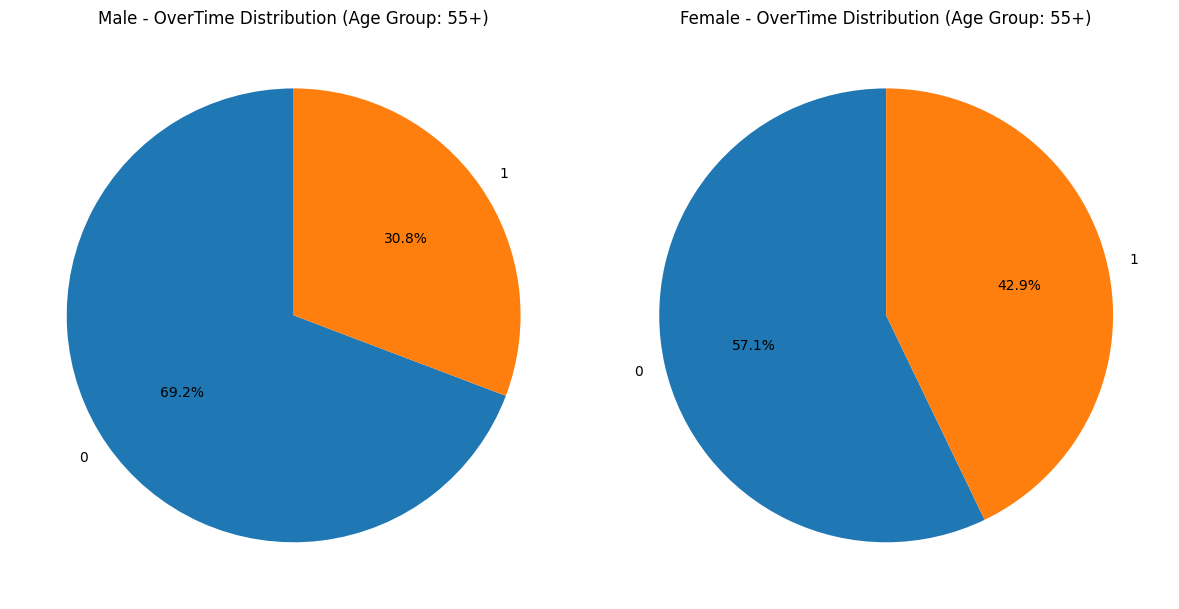

In [108]:
grouped = df.groupby(['AgeGroup', 'Gender', 'OverTime']).size().unstack(fill_value=0)

age_groups = grouped.index.levels[0]

for age in age_groups:
    subset = grouped.loc[age]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    labels = subset.columns.tolist()

    # Plotting for Male
    axs[0].pie(subset.loc['Male'], labels=labels, autopct='%1.1f%%', startangle=90)
    axs[0].set_title(f'Male - OverTime Distribution (Age Group: {age})')

    # Plotting for Female
    axs[1].pie(subset.loc['Female'], labels=labels, autopct='%1.1f%%', startangle=90)
    axs[1].set_title(f'Female - OverTime Distribution (Age Group: {age})')

    plt.tight_layout()
    plt.show()